# CUPED for Starters: Enhancing Controlled Experiments with Pre-Experiment Data

### Intro

In this article I am going to explain what are the randomized controlled experiments and why modern companies use them. Then I will explain what is a CUPED and why it works in theory. After it we will run a simulation of an A/B test without any adjustment to the ordinary procedure. And then comapre results with CUPED adjusted procedure to see that CUPED allows to detect smaller results on the same sample size

### What are Controlled Experiments and why we need them

Controlled experiments, a cornerstone of data science, are systematic and controlled approaches used to investigate the impact of specific changes, interventions, or treatments on a target system. In these experiments, researchers manipulate one or more variables while keeping other factors constant, creating a controlled environment to observe and measure the effects accurately. The goal is to establish a causal relationship between the manipulated variables and the observed outcomes. Controlled experiments provide valuable insights into cause-and-effect relationships, enabling data scientists, researchers, and decision-makers to make informed choices based on empirical evidence rather than mere correlations or assumptions.

Usually, people encounter controlled experiments in a form of A/B tests. In an A/B test, a single variable (such as a webpage layout, email subject line, or advertisement) is changed between two versions: A (the control) and B (the variant). The goal of an A/B test is to compare the performance of these two versions to determine which one performs better in terms of a specific metric (e.g., click-through rates, conversion rates). A/B tests are commonly used in marketing and web optimization to make data-driven decisions about changes to user interfaces or marketing materials.

To perform an A/B test you have to gather some data. Amount of data you need is directly connected to the variance of the metric you want to compare between two groups. The more chosen metric fluctuates naturally, the more data you need to spot the difference between two groups. The more data you need, the longer you will wait till you get the results. And time is money! That is is why researchers at Microsoft came up with a [CUPED technique](https://dl.acm.org/doi/10.1145/2433396.2433413). This statistical trick helps you to decrease variance of the tested metric. With lower variance you either need smaller sample size to spot the same difference, or you can spot smaller difference with the same sample size.

### What is CUPED and how it works?

CUPED stands for "Controlled-Experiment using Pre-Experiment Data". Idea is simple, modify  metric of interest in a way that its expectation does not change while variance decreases. Interesting part is how to do so! 

Suppose you want to test if there is difference in metric $Y$. In a usual A/B test, you would calculate mean value of the metric in control group $\bar{Y}_{A}$ and then compare it with mean value of the metric in test group $\bar{Y}_{B}$. 

Researches suggested this transformation:
$$
\hat{Y}_{CUPED} = \bar{Y} - \theta(\bar{X} - E(X))
$$
Where $X$ is a random variable that is correlated with $Y$ but not affected by A/B test. And $\theta$ is some arbitrary (for now) constant.

Great candidate for $X$ is the same metric $Y$ but before the start of the test. Hence, there is "pre-experiment" in the name of the method.

But how this helps to decrease variance and not mess up the results? Theoretical explanation in the paper was not easy enough for me. So, let us derive results by ourselves.

First of all, $\hat{Y}_{CUPED}$ is an unbiased estimator of $E(Y)$:

**HERE WILL BE A HAND WRITTEN PROOF**

Secondly, let us derive the $Var(\hat{Y}_{CUPED})$:

**HERE WILL BE A HAND WRITTEN PROOF**

Now, let us find a value of $\theta$ that minimize this variance:

**HERE WILL BE A HAND WRITTEN PROOF**

With such $\theta$ we will have $Var(\hat{Y}_{CUPED})$:

**HERE WILL BE A HAND WRITTEN PROOF**

Cool! Variance is $(1 - \rho^2)$ times smaller that the variance of our initial estimate $Var(\bar{Y})$!
The higher the correlation between $X$ and $Y$, the higher is the variance reduction power.

### How to use CUPED in practice?

Enough theory for today, let us apply this technique to a real world problem.

Suppose we are working for some food delivery service (like Uber Eats, for example). Each restaurant there has a display of meals user can order. There are soo many meals that we want to recommend something to user to speed up choosing process. The faster he places an order, the faster he get his food, the faster he become happy! 

We already have a recommendation engine A, but ML team introduce another recommendation engine B. Now we want to understand which engine is better. We need and A/B test! Let us randomly expose each user to either engine A or engine B. Now we need some metric to compare between two groups. In my opinion, money is the best metric as each business tries to maximize its profits. So let us measure commission revenue that we get from user within two weeks!

I have prepared a simple dataset that represents this A/B test. Each row represents a user.
Here is an explanation what each column means:
1. `group` - is either `test` or `control`, if it is `test` then user is in the group with new recommendation engine
2. `user_id` - unique identifier of a user
3. `commission_revenue_pre` - comission revenue company got from orders of this user in a pre-experiment period
4. `commission_revenue_exp` - comission revenuew conapmy for from order of this user during an experiment period

The only thing that is different from real-life here is that I know exactly what was the impact of a new engine on the metric. If user is exposed to engine B, his `commission_revenue_exp` will increase by 2%.

Let us do the usual A/B test comparing average `commission_revenue_exp` for two engines using t-test (assume that all assumptions hold and we can use it here). 

First of all, we need to import some useful libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Now, let's load the data

In [2]:
exp_data = pd.read_csv('./input/commission_revenue.csv')

exp_data.sample(20)

,group,user_id,commission_revenue_pre,commission_revenue_exp
427,control,a2c28aa2-be00-433e-b2ba-c0942569cd61,118.077501,131.503040
356,test,4fb4b9f9-17c7-40d9-993d-a3bc38158788,75.308008,71.385956
1028,test,bd952ad0-d2fb-4d5d-93d4-e9635f05bfb2,57.822044,58.550117
1895,test,70a0adf4-3cf4-450c-8f61-0bcea3d95a83,158.698903,135.279963
220,control,7c2b4400-2e29-4fab-926b-d6475d3366cd,72.672643,52.795449
745,test,950fd61b-75aa-44ce-a004-ed01070604aa,76.275739,117.632763
956,control,50f6100b-1037-4b68-946f-5c10ee8f1491,86.207136,42.884531
683,control,fa199b8c-0d9c-41a9-98de-ac7c9da29894,68.065260,52.034118
1169,control,e8417d43-dc1f-4d70-87eb-7b5723db78a4,159.578993,119.856559
1359,control,99baa565-18df-448d-821b-27f2e80a39ea,133.700096,135.306377


Let's have a look at the average comission revenue during the experiment in two groups:

In [3]:
commission_revenue_exp_test_avg = exp_data[exp_data['group'] == 'test']['commission_revenue_exp'].mean()
commission_revenue_exp_control_avg = exp_data[exp_data['group'] == 'control']['commission_revenue_exp'].mean()

print(f'In a test group (new engine B) the metric is on average equal to {commission_revenue_exp_test_avg:0.2f}')
print(f'In a control group (old engine A) the metric is on average equal to {commission_revenue_exp_control_avg:0.2f}')
print(f'Relative increase is equal to {100.0 * (commission_revenue_exp_test_avg / commission_revenue_exp_control_avg - 1):0.1f}%')

In a test group (new engine B) the metric is on average equal to 101.73
In a control group (old engine A) the metric is on average equal to 99.24
Relative increase is equal to 2.5%


Well, we have already known that engine B increases metric by two percent becuase data was synthetically created. But in real world we need to run some statistical procedures to understand whether this increase is statistically significant or not. Maybe we were just lucky to get this result.

Using [Student's t-tets](https://en.wikipedia.org/wiki/Student%27s_t-test) we can test a hypothesis of zero difference in the averages of two groups. For this test let's use $alpha = 0.05$ meaning that we will test this hypothesis at 5% significance level.

In [4]:
stats.ttest_ind(
    exp_data[exp_data['group'] == 'test']['commission_revenue_exp'], 
    exp_data[exp_data['group'] == 'control']['commission_revenue_exp']
)

Ttest_indResult(statistic=1.8021000484396446, pvalue=0.0716803352566017)

We got p-value somewhere near $0.07$ which is definetely greater than $0.05 / 2 = 0.025$. Then, we cannot reject the null hypothesis of equal averages. This means that we did not see any statististically significant imrovement in the target metric from the using new recommendation engine B in production.

You may ask how this have happend, if we know that there must be a increase of 2%. When we have infinite number of observations, sample means are equal to population means (because of [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)). Unfortunately, we have to operate with finite samples in our experiments. This introduces some variation in our estimates of parameters of distributions. So, we always have some margin of error in our estimates. And the sameller the sample size the bigger is the margin or error. When sample size is not big enough, we may not say for sure that the difference between two samples is not present because of random associated with finite sample size.

As we discussed earlier, CUPED can help us improve sensitivity by decreasing variance of the metric we compare between two groups. Ultimately, this mean that for the same sample size we can detect smaller changes in parameters. Let's make a CUPED transformation using `commission_revenue_pre`. We can do so, because `commission_revenue_pre` is highly likely to be correlated with `commission_revenue_exp` becuase this is the same metric of for the same users but in different time periods. But `commission_revenue_pre` if not affected by the new engine B because engine B was introduced after the metric was calculated. Hence, `commission_revenue_pre` is an amazing candidate for `X`.

Having a closer look at the data, you can spot that now all users have a `commission_revenue_pre` defined. This is absolutely normal in real world - some user do not have pre-experiment data because they were not users before the experiment! We just need to understand what to do we "newbies". Here we can rely on experience of Booking.com on how to handle missing data. They [suggest](https://booking.ai/how-booking-com-increases-the-power-of-online-experiments-with-cuped-995d186fff1d) to do nothing to the metric in case pre-experiment data is not available. Idea behind this trick is straight forward. When there is a missing value, you want to fill it with an average derived from the samples where this value is not missing. So, you will plug $\bar{X}$ into the $X_i$ in CUPED transformation and it will be cancelled out with $E(X)$ with big enough sample size!

Now, let's calculate $\theta$, handle missing values and make sure that CUPED transformation yield an unbiased estimate:

In [5]:
not_null_pre = ~exp_data['commission_revenue_pre'].isna()

theta = np.corrcoef([exp_data[not_null_pre]['commission_revenue_pre'], 
                     exp_data[not_null_pre]['commission_revenue_exp']])[0,1]
theta

0.8887204637262932

In [6]:
exp_data['commission_revenue_exp_cuped'] = np.where(
    not_null_pre,
    exp_data['commission_revenue_exp'] - theta * (
        exp_data['commission_revenue_pre'] - exp_data['commission_revenue_pre'].mean()
    ),
    exp_data['commission_revenue_exp']
)

In [7]:
commission_revenue_exp_cuped_test_avg = exp_data[exp_data['group'] == 'test']['commission_revenue_exp_cuped'].mean()
commission_revenue_exp_cuped_control_avg = exp_data[exp_data['group'] == 'control']['commission_revenue_exp_cuped'].mean()

print(f'In a test group (new engine B) the CUPED-metric is on average equal to {commission_revenue_exp_cuped_test_avg:0.2f}')
print(f'In a control group (old engine A) the CUPED_metric is on average equal to {commission_revenue_exp_cuped_control_avg:0.2f}')
print(f'Relative increase is equal to {100.0 * (commission_revenue_exp_cuped_test_avg / commission_revenue_exp_cuped_control_avg - 1):0.1f}%')

In a test group (new engine B) the CUPED-metric is on average equal to 101.69
In a control group (old engine A) the CUPED_metric is on average equal to 99.28
Relative increase is equal to 2.4%


In test group we got 101.73 before transformation and 101.69 after. There is 0.04 absolute difference that appears because of the fact that $\bar{X} = E(X)$ only in limit where we have infinite number of samples. In our real world case sample size is finite, hence, we have some difference.

Somewhere above we have proved that variance of sample average CUPED-metric is $(1-\rho^2)$ smaller, where $\rho=\theta$. So, we must see this in real data also.

In [8]:
var_Y = np.std(exp_data[exp_data['group'] == 'test']['commission_revenue_exp'])**2
var_Y_bar = var_Y / len(exp_data[exp_data['group'] == 'test'])

var_Y_CUPED = np.std(exp_data[exp_data['group'] == 'test']['commission_revenue_exp_cuped'])**2
var_Y_CUPED_bar = var_Y_CUPED / len(exp_data[exp_data['group'] == 'test'])

print(f'Var(Y_bar) = {var_Y_bar:0.2f}')
print(f'Var(Y_CUPED_bar) = {var_Y_CUPED_bar:0.2f}')
print(f'(1 - rho^2) = {1 - theta**2:0.3f}')
print(f'Var(Y_CUPED_bar) / Var(Y_bar) = {var_Y_CUPED_bar / var_Y_bar:0.3f}')

Var(Y_bar) = 1.00
Var(Y_CUPED_bar) = 0.21
(1 - rho^2) = 0.210
Var(Y_CUPED_bar) / Var(Y_bar) = 0.209


Amazing, empirics support theory!

Decrease in variance can also be visualized easily. We assume that metric is normally distributed. Metric with lower variance would have "slimmer" probability mass function with "taller" peak:

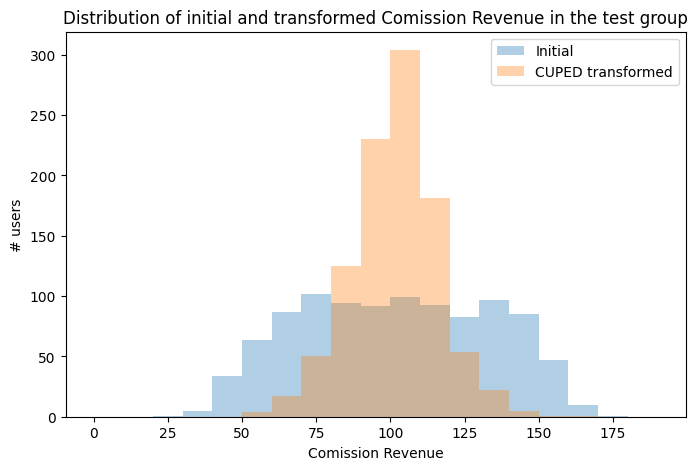

In [9]:
plt.figure(figsize=(8, 5))

plt.hist(exp_data[exp_data['group'] == 'test']['commission_revenue_exp'], 
         bins=np.arange(0.0, 200.0, 10.0), 
         alpha=0.35,
         label='Initial')

plt.hist(exp_data[exp_data['group'] == 'test']['commission_revenue_exp_cuped'], 
         bins=np.arange(0.0, 200.0, 10.0), 
         alpha=0.35,
         label='CUPED transformed')

plt.legend()

plt.xlabel('Comission Revenue')
plt.ylabel('# users')

plt.title('Distribution of initial and transformed Comission Revenue in the test group')

plt.savefig('./output/distributions.png', bbox_inches='tight', dpi=100)

plt.show()

OK, we are sure that transformed metric is an unbised estimator both empirically and theoretically. We have seen that variance indeed decreases with such transformation. Now let's rerun our A/B test using transformed metric:

In [10]:
stats.ttest_ind(
    exp_data[exp_data['group'] == 'test']['commission_revenue_exp_cuped'], 
    exp_data[exp_data['group'] == 'control']['commission_revenue_exp_cuped']
)

Ttest_indResult(statistic=3.724388123229215, pvalue=0.0002012172925032228)

The p-value is $0.0002$ with is lower than $0.025$ by at least on order! Finally, we've got a statistically significant result! Now we have statistical proof of the fact that engine's B recommendations really increase commission revenue. Based on the results we recommend to roll-out new functionality to 100% users to increase the metric by two 2% of the full scale of a company.

### Conclusion

I hope now you understand what is CUPED and how it can be used to enchance you A/B experiments in production. 

If you have any questions, do not hesitate to reach me out on [LinkedIn](https://www.linkedin.com/in/igorkhomyanin/) :)

### References

1. Kohavi, Ron & Deng, Alex & Xu, Ya & Walker, Toby. (2013). Improving the Sensitivity of Online Controlled Experiments by Utilizing Pre-Experiment Data. 10.1145/2433396.2433413. 
2. https://en.wikipedia.org/wiki/Student%27s_t-test
3. https://en.wikipedia.org/wiki/Central_limit_theorem
4. "How Booking.com increases the power of online experiments with CUPED" by Simon Jackson at https://booking.ai/how-booking-com-increases-the-power-of-online-experiments-with-cuped-995d186fff1d 